# Simulation Based Inference

This tutorial will explore the method of simulation based inference, a form of likelihood free inference, as implemented in the sbi package.

This notebok is a demonstration of the tutorial provided by the developers or sbi and can be found [here](https://www.mackelab.org/sbi/tutorial/01_gaussian_amortized/) 

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate

import sbi.utils as utils
from sbi.inference.base import infer

Create three parameters with a uniform distribution between -2 and 2. 

In [3]:
dims = 3
prior = utils.BoxUniform(low=-2*torch.ones(dims), high=2*torch.ones(dims))

Define a linear function on which to perform inference. 

In [4]:
f = lambda theta: theta + 1.0 + torch.randn_like(theta) * 0.1 

In [5]:
posterior = infer(f, prior, 'SNPE', num_simulations=1000)


Neural network successfully converged after 115 epochs.


In [6]:
x_o_1 = torch.zeros(3,)
x_o_2 = 2.0*torch.ones(3,)

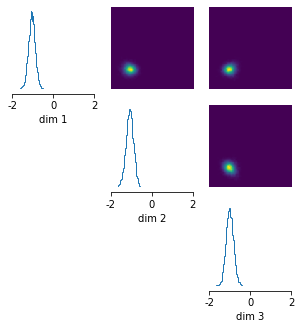

In [7]:
posterior_samples_1 = posterior.sample((10000,), x=x_o_1)

_ = utils.pairplot(posterior_samples_1, limits=[[-2,2],[-2,2],[-2,2]], fig_size=(5,5))



In [9]:
x = np.array(posterior_samples_1[:,0])

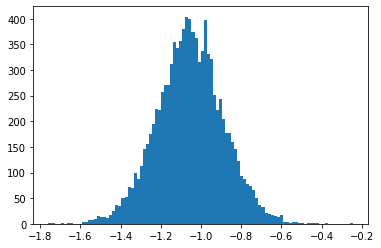

In [10]:
plt.hist(x, bins=100)
plt.show()

## Fitzhugh-Nagumo Model: Parameter Estimation

Having used sbi on a simple model, we will now try a slightly more complicated mode, notably the Fitzhugh-Nagumo model. 

In [13]:
def fitzhugh_nagumo(u, t):

    v, w = u
    #a, b, I, R, τ = p

    dvdt = v - (v**3)/3 - w  + R * I

    dwdt = (v + a - (b * w)) / tau

    return [dvdt, dwdt]

def simulate(u, t):
    sol = integrate.odeint(fitzhugh_nagumo, u, t)
    return sol

In [28]:
u = [-2.0, 1.0]
a, b, I, R, tau = [0.7, 0.8, 0.34, 1.0, 10]
t = np.arange(0.0, 1000, 0.1)

In [29]:
model = simulate(u, t)
data = model[:,0] + np.random.normal(0, np.sqrt(1/10), t.shape[0])

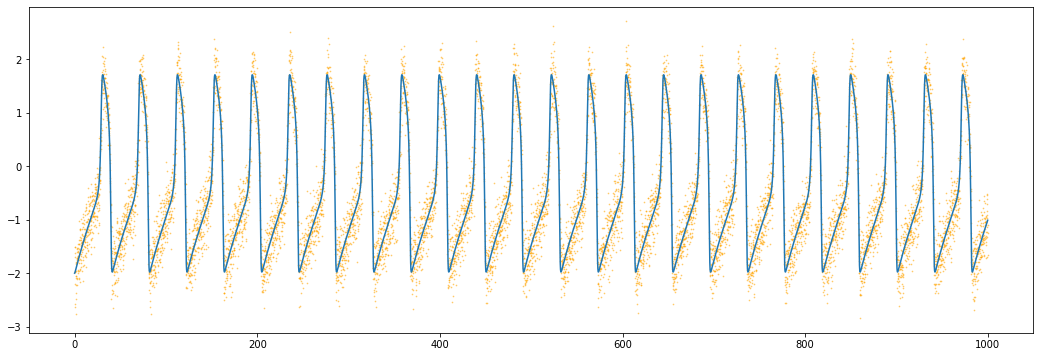

In [30]:
plt.figure(figsize=(18,6))
plt.plot(t, model[:,0])
plt.scatter(t, data, c = 'orange', s = 0.5, alpha=0.5)
plt.show()